In [3]:
from alpha_vantage.timeseries import TimeSeries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as se
se.set()

In [502]:

DOW = ['MMM','AXP','AAPL','BA',
       'CAT','CVX','CSCO','KO',
       'DIS','DOW','XOM','GS',
      'HD','IBM','INTC','JNJ',
      'JPM','MCD','MRK','MSFT',
      'PFE','PG','TRV','UTX',
      'UNH','VZ','V','WMT','WBA']

In [503]:
#prepare the data
def p_return(df):
    df_op = df["1. open"].values
    df_cl = df["4. close"].values
    p = ((df_op*(df_op-df_cl))/df_op)
    return p

v = []

startDate = '2020-1-01'
endDate = '2020-3-02'

strStocks = "DOW"
Stocks = DOW
buy=np.empty((len(Stocks),1))
sell=np.empty((len(Stocks),1))

i = 0 
for s in Stocks:
    fn = strStocks + "/" + s + ".csv"
    temp = pd.read_csv(fn,usecols=["date","1. open","4. close"]
                       ,engine='c',index_col=0)
    temp.index = pd.to_datetime(temp.index)
    v.append(p_return(
        temp[(temp.index >= startDate) & (temp.index <= endDate )])
            )
    buy[i]=temp["1. open"][0]
    sell[i]=temp["4. close"][-1]
    i+=1

In [504]:
#covariance matrix
sigma = np.cov(v)
sigma =  np.reshape(sigma,(len(Stocks),len(Stocks)))

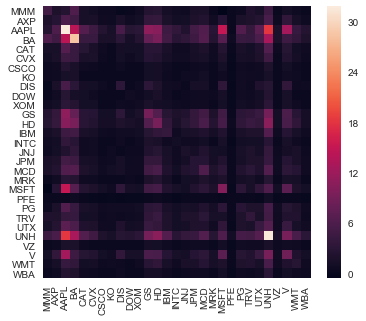

In [505]:
#covariance heat map
plt.figure(figsize=(6,5))
se.heatmap(sigma,xticklabels=Stocks,yticklabels=Stocks,)

In [506]:
##First Fixed Point
#init weights to invers var
v = np.diag(sigma)
v = np.reshape(v, (len(v),1))
w1 = (1/v)/sum(1/v)

#first fixed point
w2 = (1/np.dot(sigma,w1))/sum(1/np.dot(sigma,w1))

In [507]:
#Variance of inverse weighted 
v1 = np.dot(np.dot(np.transpose(w1),sigma),w1)
v2 = np.dot(np.dot(np.transpose(w2),sigma),w2)

r1 = (np.dot(np.transpose(sell),w1)-np.dot(np.transpose(buy),w1))/np.dot(np.transpose(buy),w1)
r2 = (np.dot(np.transpose(sell),w2)-np.dot(np.transpose(buy),w2))/np.dot(np.transpose(buy),w2)


print("Variance of inverse weighted: %.4f \tReturn: %.4f" %(v1,r1))
print("Variance of inverse weighted: %.4f \ttReturn: %.4f" %(v2,r2))

Variance of inverse weighted: 0.4285 	Return: -0.0035
Variance of inverse weighted: 0.8536 	tReturn: 0.0075


In [508]:
#Fix point
#init weights to invers var
v = np.diag(sigma)
w = (1/v)/sum(1/v)
w = np.reshape(w, (len(w),1))

n=1000
F_last = 1000000

error = np.empty(n)
Fs[0] = np.dot(np.dot(np.transpose(w),sigma),w)
for i in range(1,n):
    
    w = (1/np.dot(sigma,w))/sum(1/np.dot(sigma,w))
    F = np.dot(np.dot(np.transpose(w),sigma),w)
    error[i]=(abs(F - F_last))
    if(abs(F - F_last<0.00001)&(i>4)):
        break
    F_last = F

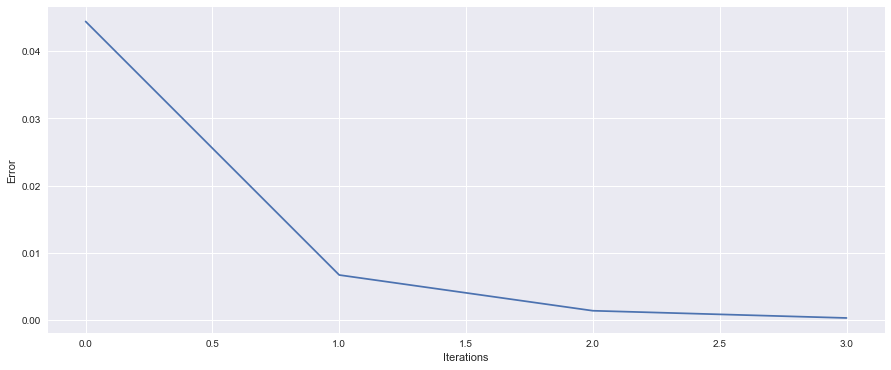

In [510]:
fig, ax = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(15)

ax.set_ylabel("Error")
ax.set_xlabel("Iterations")
ax.plot(error[2:i])

In [511]:
R=(np.dot(np.transpose(sell),w)-np.dot(np.transpose(buy),w))/np.dot(np.transpose(buy),w)
print("Return on Risk Parity Portfolio %.4f" %(R))

Return on Risk Parity Portfolio 0.0075


In [512]:
for i in range(len(Stocks)):
    print("%s: %.4f" %(Stocks[i],w1[i]))

MMM: 0.0085
AXP: 0.0167
AAPL: 0.0014
BA: 0.0015
CAT: 0.0154
CVX: 0.0241
CSCO: 0.1157
KO: 0.1213
DIS: 0.0131
DOW: 0.0513
XOM: 0.0469
GS: 0.0048
HD: 0.0047
IBM: 0.0111
INTC: 0.0427
JNJ: 0.0241
JPM: 0.0166
MCD: 0.0072
MRK: 0.0310
MSFT: 0.0042
PFE: 0.2045
PG: 0.0148
TRV: 0.0120
UTX: 0.0101
UNH: 0.0014
VZ: 0.0939
V: 0.0051
WMT: 0.0158
WBA: 0.0803
